In [32]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import preprocess
import training_dataset
import rnn_models
import training 
import importlib
import training  # replace 'your_module' with the name of your module

# Reload the module
importlib.reload(rnn_models)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pd.reset_option('^display.', silent=True)

In [5]:
df = pd.read_csv('../20220801_book_updates.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818336 entries, 0 to 818335
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   COLLECTION_TIME  818336 non-null  object 
 1   MESSAGE_ID       818336 non-null  int64  
 2   MESSAGE_TYPE     818336 non-null  object 
 3   SYMBOL           818336 non-null  object 
 4   BID_PRICE_1      818336 non-null  float64
 5   BID_SIZE_1       818336 non-null  int64  
 6   BID_PRICE_2      818336 non-null  float64
 7   BID_SIZE_2       818336 non-null  int64  
 8   BID_PRICE_3      818336 non-null  float64
 9   BID_SIZE_3       818336 non-null  int64  
 10  ASK_PRICE_1      818336 non-null  float64
 11  ASK_SIZE_1       818336 non-null  int64  
 12  ASK_PRICE_2      818336 non-null  float64
 13  ASK_SIZE_2       818336 non-null  int64  
 14  ASK_PRICE_3      818336 non-null  float64
 15  ASK_SIZE_3       818336 non-null  int64  
dtypes: float64(6), int64(7), object(3)
mem

In [6]:
new_df = preprocess.process_data(df)

In [7]:
new_df

,BID_PRICE_1,BID_SIZE_1,BID_PRICE_2,BID_SIZE_2,BID_PRICE_3,BID_SIZE_3,ASK_PRICE_1,ASK_SIZE_1,ASK_PRICE_2,ASK_SIZE_2,...,SPREAD,ASK_PRICE_MEAN,BID_PRICE_MEAN,ASK_VOL_MEAN,BID_VOL_MEAN,PRICE_ACCUMULATED_DIFFERENCE,VOL_ACCUMULATED_DIFFERENCE,VOLUME_IMBALANCE,BID_ASK_SPREAD_RATIO,Time_Delta
0,0.163148,0.033011,0.185047,0.038165,0.558271,0.038165,0.147348,0.001225,0.251969,0.010002,...,0.005114,0.034179,0.098362,0.023703,0.079589,0.558129,0.343714,0.628839,0.004976,NaN
1,0.163148,0.033011,0.186916,0.038165,0.186090,0.038165,0.147348,0.001225,0.251969,0.010002,...,0.005114,0.034179,0.876214,0.023703,0.079589,0.011378,0.343714,0.628839,0.004976,352000.0
2,0.163148,0.033011,0.186916,0.038165,0.186090,0.038165,0.143418,0.101858,0.143701,0.001225,...,0.004327,0.026461,0.876214,0.085270,0.079589,0.006224,0.385101,0.565480,0.004211,2192128.0
3,0.163148,0.033011,0.186916,0.038165,0.186090,0.038165,0.147348,0.001225,0.251969,0.010002,...,0.005114,0.034179,0.876214,0.023703,0.079589,0.011378,0.343714,0.628839,0.004976,0.0
4,0.163148,0.033011,0.186916,0.038165,0.186090,0.038165,0.147348,0.001225,0.251969,0.010002,...,0.005114,0.034179,0.876214,0.023703,0.079589,0.011378,0.343714,0.628839,0.004976,1037824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818331,0.479846,0.166389,0.499065,0.192367,0.558271,1.000000,0.479371,0.101858,0.478346,0.101858,...,0.006688,0.175704,0.679394,0.215022,0.971576,0.244227,0.131402,0.616887,0.006477,70274048.0
818332,0.479846,0.166389,0.499065,0.192367,0.558271,1.000000,0.481336,0.101858,0.543307,0.081445,...,0.007081,1.000000,0.679394,0.153455,0.971576,0.794659,0.090016,0.616887,0.006858,1379840.0
818333,0.479846,0.166389,0.499065,0.192367,0.558271,1.000000,0.455796,0.040621,0.478346,0.101858,...,0.001967,0.174501,0.679394,0.168847,0.971576,0.243424,0.100362,0.655443,0.001907,18176.0
818334,0.479846,0.166389,0.499065,0.192367,0.558271,1.000000,0.481336,0.101858,0.543307,0.081445,...,0.007081,1.000000,0.679394,0.153455,0.971576,0.794659,0.090016,0.616887,0.006858,1792.0


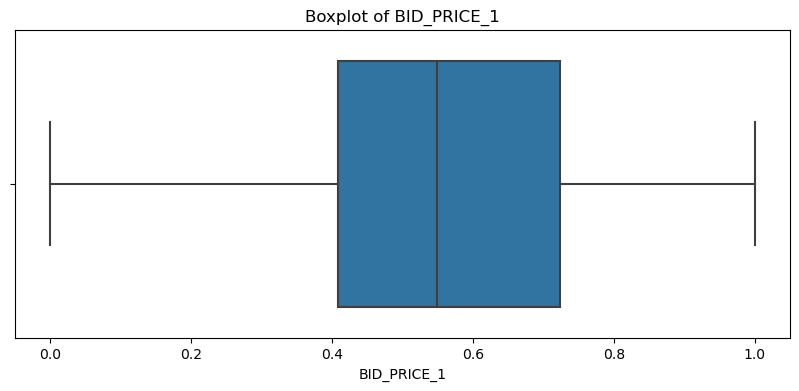

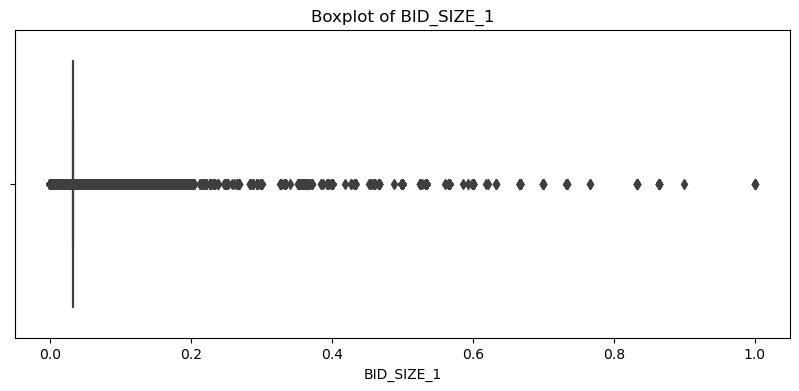

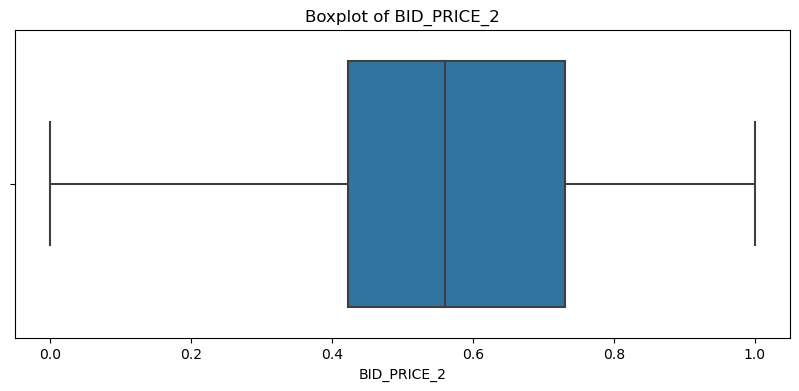

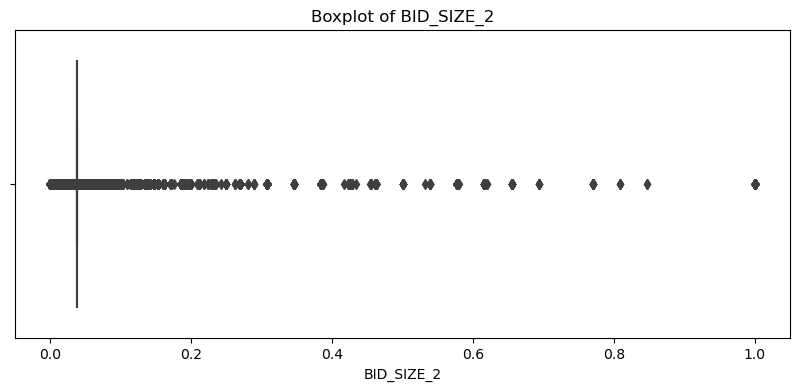

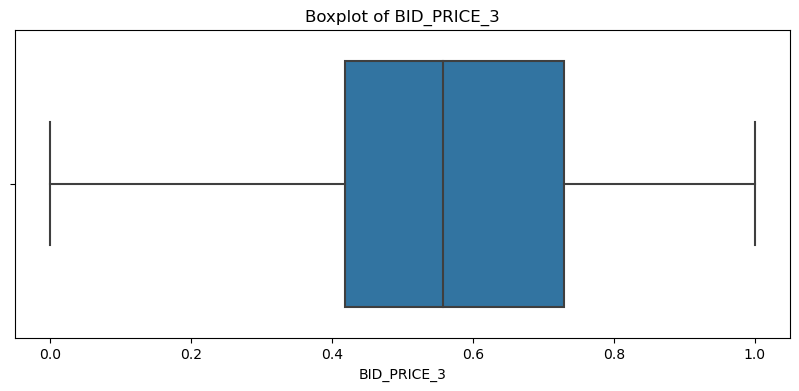

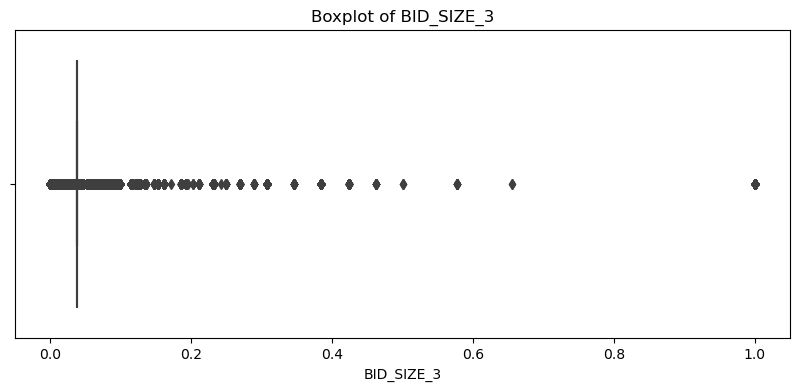

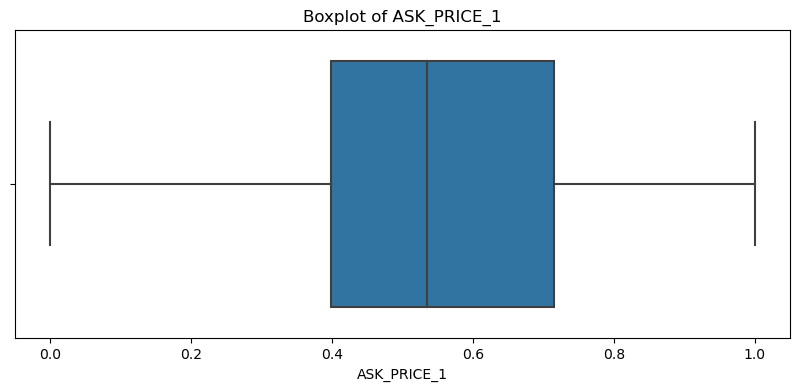

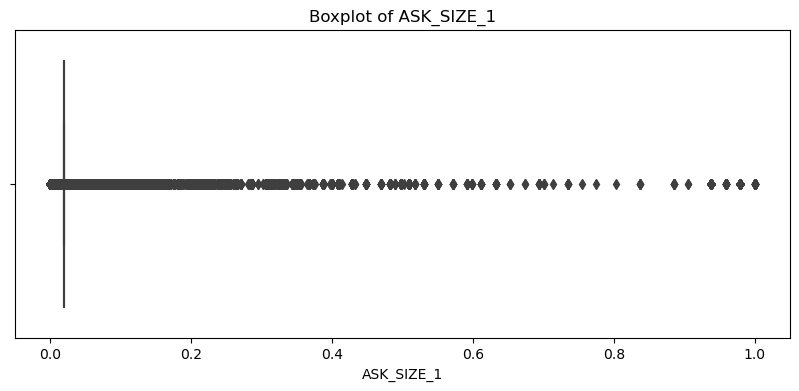

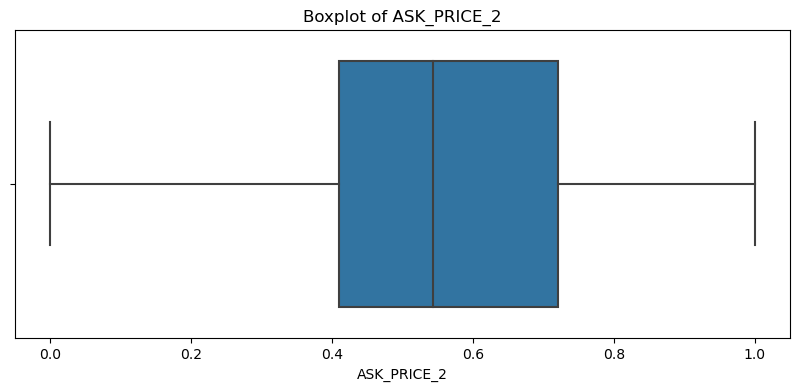

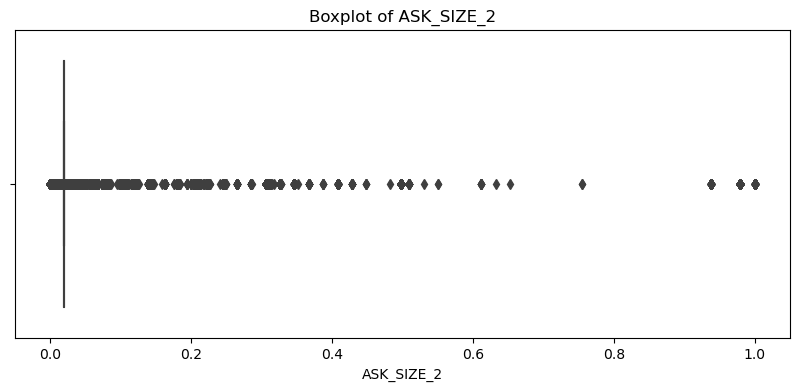

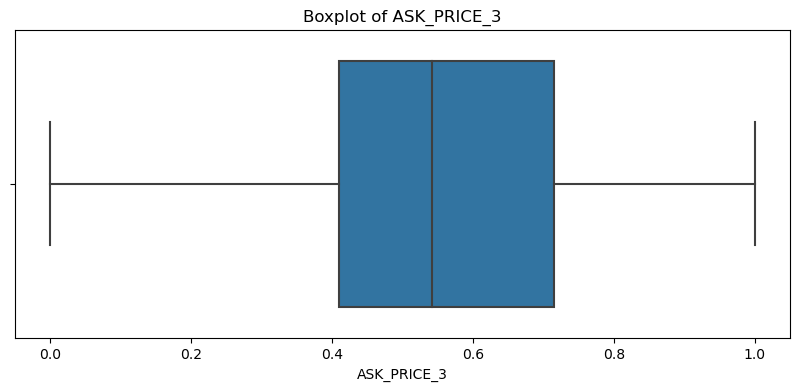

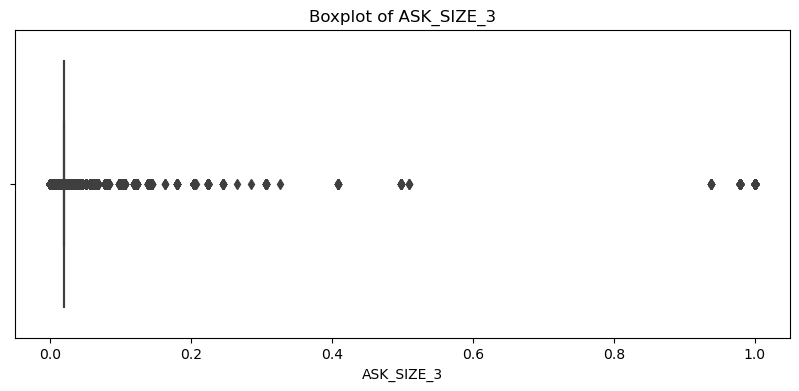

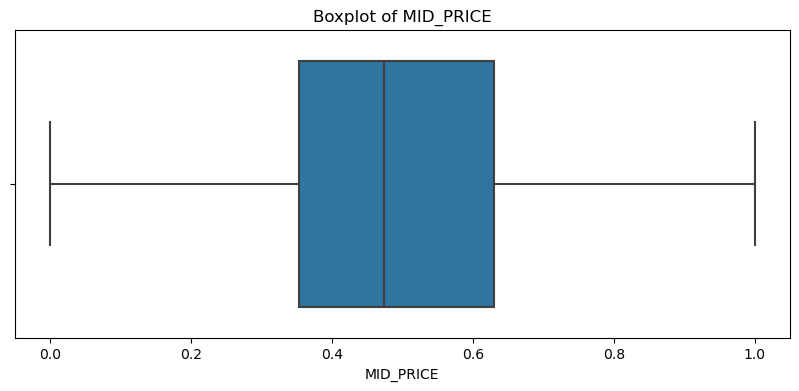

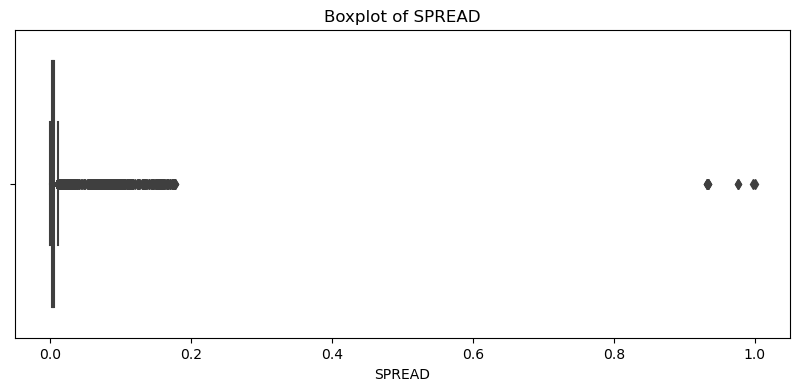

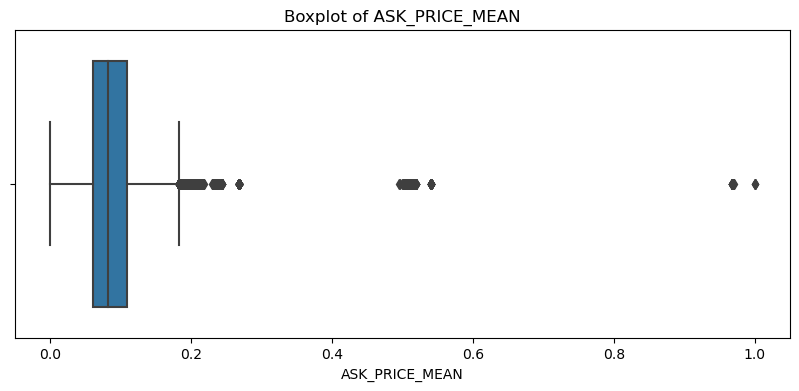

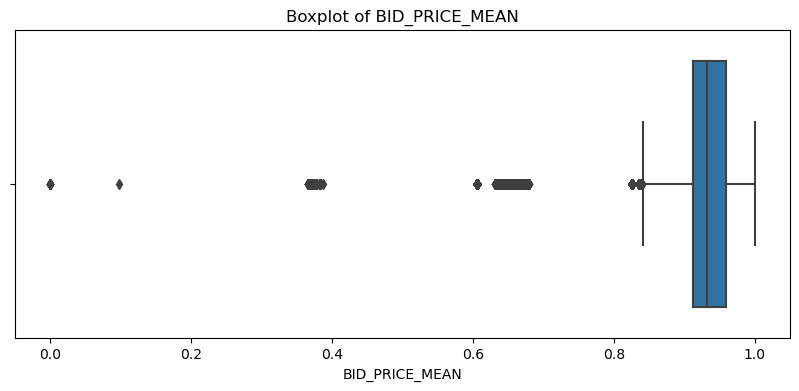

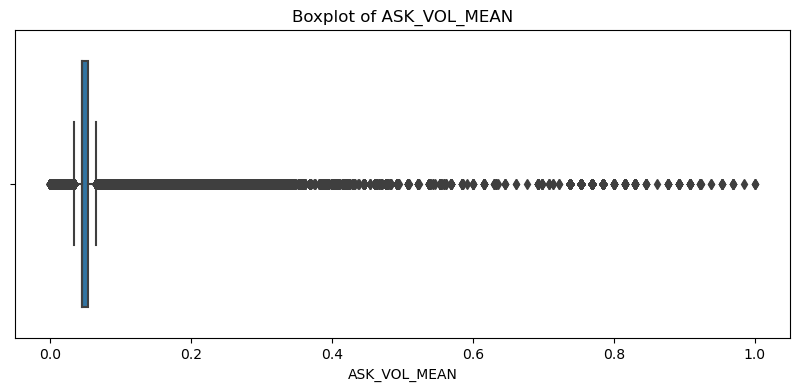

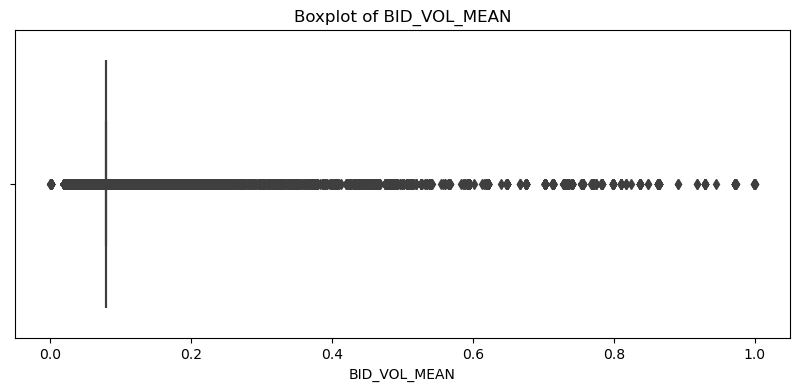

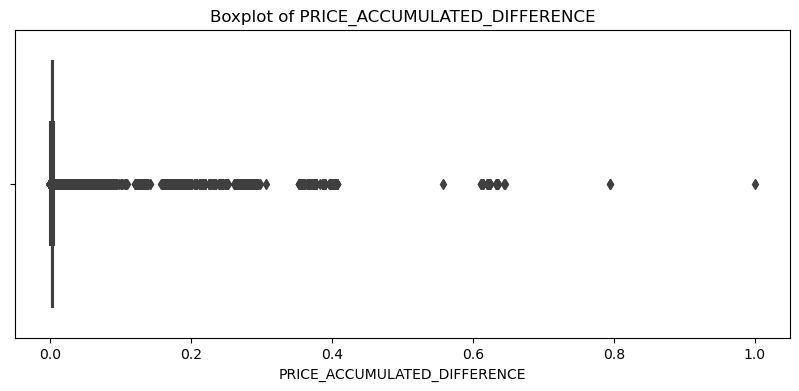

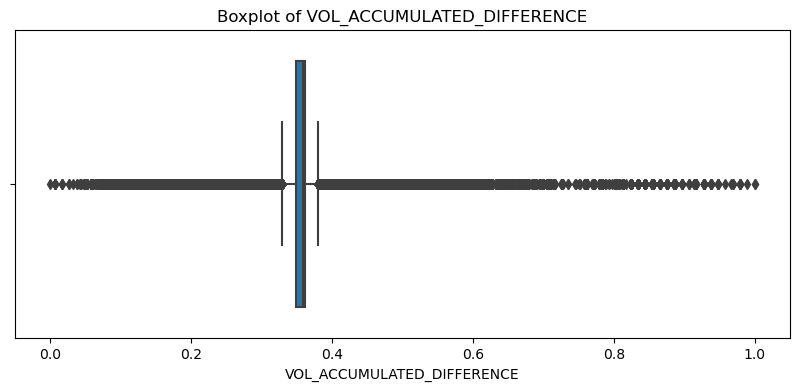

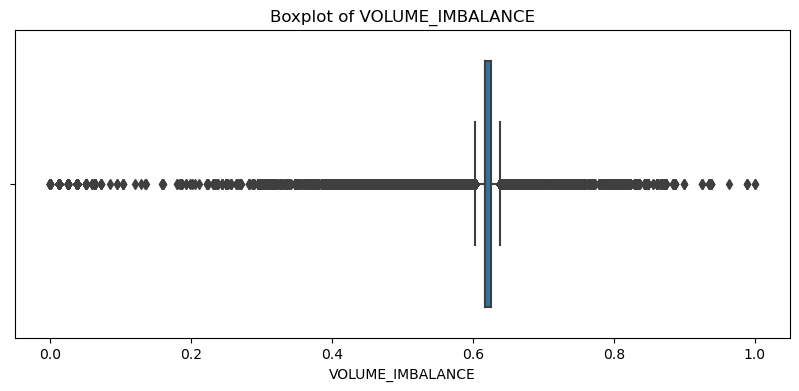

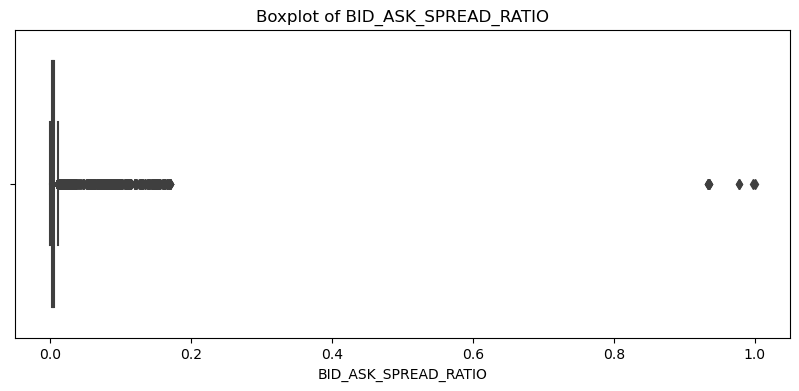

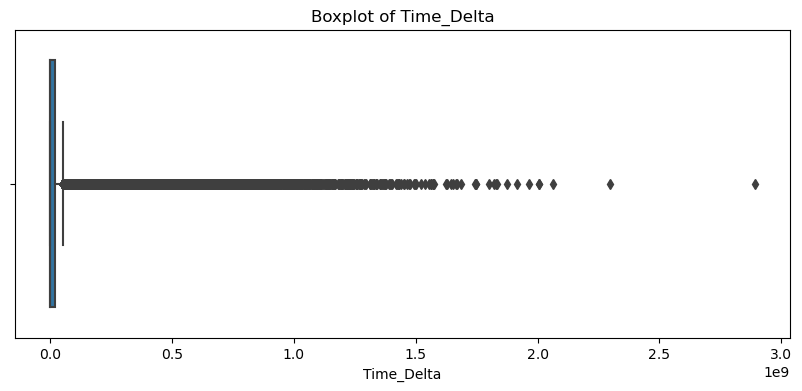

In [8]:
for column in new_df:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=new_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [9]:
new_df.describe()

,BID_PRICE_1,BID_SIZE_1,BID_PRICE_2,BID_SIZE_2,BID_PRICE_3,BID_SIZE_3,ASK_PRICE_1,ASK_SIZE_1,ASK_PRICE_2,ASK_SIZE_2,...,SPREAD,ASK_PRICE_MEAN,BID_PRICE_MEAN,ASK_VOL_MEAN,BID_VOL_MEAN,PRICE_ACCUMULATED_DIFFERENCE,VOL_ACCUMULATED_DIFFERENCE,VOLUME_IMBALANCE,BID_ASK_SPREAD_RATIO,Time_Delta
count,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,...,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,818336.000000,8.183350e+05
mean,0.558299,0.044838,0.570345,0.043832,0.565839,0.043635,0.548007,0.040137,0.556196,0.023935,...,0.004394,0.084531,0.933856,0.065103,0.097011,0.004485,0.364885,0.608899,0.004254,2.859443e+07
std,0.209688,0.047704,0.205475,0.033580,0.210586,0.050174,0.212527,0.065832,0.210500,0.039328,...,0.005282,0.033932,0.035141,0.063269,0.061843,0.012837,0.047230,0.046061,0.005184,7.017336e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.408829,0.033011,0.422430,0.038165,0.419173,0.038165,0.398821,0.020208,0.409449,0.020208,...,0.002360,0.061542,0.912017,0.045713,0.079589,0.002343,0.348474,0.616759,0.002285,1.190400e+05
50%,0.548944,0.033011,0.560748,0.038165,0.558271,0.038165,0.534381,0.020208,0.543307,0.020208,...,0.003934,0.082089,0.932965,0.045713,0.079589,0.002945,0.358510,0.616887,0.003794,1.103872e+06
75%,0.723608,0.033011,0.730841,0.038165,0.729323,0.038165,0.715128,0.020208,0.720472,0.020208,...,0.005901,0.109853,0.958865,0.053409,0.079589,0.003748,0.361200,0.625627,0.005727,2.137395e+07
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.890375e+09


In [10]:
dataset = training_dataset.OrderBookDataset(new_df, 60, 1)

In [11]:
print(dataset[0])
print(len(dataset.label))

(array([[1.63147793e-01, 3.30110037e-02, 1.85046729e-01, ...,
        3.43714434e-01, 6.28839481e-01, 4.97564258e-03],
       [1.63147793e-01, 3.30110037e-02, 1.86915888e-01, ...,
        3.43714434e-01, 6.28839481e-01, 4.97564258e-03],
       [1.63147793e-01, 3.30110037e-02, 1.86915888e-01, ...,
        3.85100879e-01, 5.65480015e-01, 4.21087976e-03],
       ...,
       [1.86180422e-01, 1.66388796e-01, 1.98130841e-01, ...,
        3.48266943e-01, 6.74591955e-01, 3.86280393e-04],
       [1.86180422e-01, 1.66388796e-01, 1.98130841e-01, ...,
        3.68960166e-01, 6.48888318e-01, 3.86280393e-04],
       [1.86180422e-01, 1.66388796e-01, 1.98130841e-01, ...,
        3.48266943e-01, 6.74591955e-01, 3.86280393e-04]]), 1)
818275


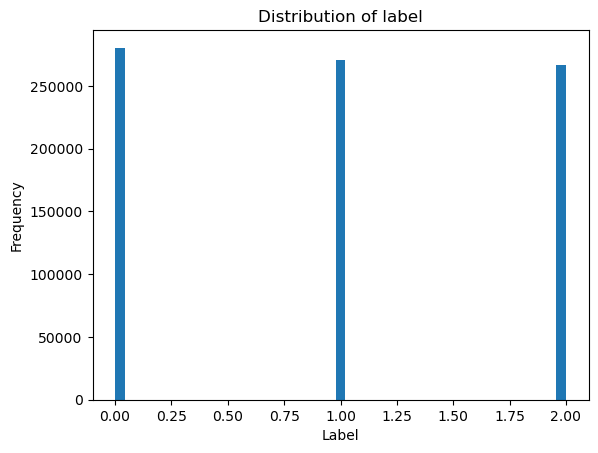

In [12]:
import matplotlib.pyplot as plt

# Assume 'label' is a numpy array or a pandas Series
plt.hist(dataset.label, bins='auto')  # 'auto' automatically determines the number of bins
plt.title('Distribution of label')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [13]:
from torch.utils.data import Dataset, Subset, DataLoader
from sklearn.utils import compute_class_weight
from torch.utils.data import WeightedRandomSampler, BatchSampler

def split_dataset(dataset, split_ratio):
    
    # Calculate the sizes of the splits
    train_size = int(split_ratio * len(dataset))
    remaining_ratio = (1 - split_ratio)/2
    test_size = int(remaining_ratio* len(dataset))
    val_size = len(dataset) - train_size - test_size
    
    # Create indices for the splits
    indices = list(range(len(dataset)))
    train_indices = indices[:train_size]
    val_indices = indices[train_size:(train_size + val_size)]
    test_indices = indices[(train_size + val_size):]
    return Subset(dataset, train_indices), Subset(dataset, val_indices ), Subset(dataset, test_indices)


train_set, val_set, test_set = split_dataset(dataset, 0.8)

# Compute class weight
weights = compute_class_weight('balanced', classes= np.unique(dataset.label), y= dataset.label)
class_weights = torch.FloatTensor(weights).to(device)
print(class_weights)


tensor([0.9725, 1.0068, 1.0220], device='cuda:0')


In [14]:
print([train_set.dataset[i][1] for i in train_set.indices])

[1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 

In [15]:

# Alternatively, create a weighted random sampler for use in the DataLoader
training_labels = [train_set.dataset[i][1] for i in train_set.indices]
weights = compute_class_weight('balanced', classes= np.unique(training_labels), y= training_labels)

samples_weights = torch.from_numpy(weights[training_labels])
print(len(samples_weights))
sampler = WeightedRandomSampler(weights=samples_weights, num_samples=len(samples_weights), replacement=True)

# Use this sampler in the DataLoader
batchsize = 1024
batch_sampler = BatchSampler(sampler, batchsize, drop_last=True)
train_loader = DataLoader(train_set, batch_sampler=batch_sampler,shuffle=False,)

val_loader = DataLoader(val_set, batch_size=batchsize)
test_loader = DataLoader(test_set, batch_size=batchsize)

654620


In [16]:
train_loader, val_loader, test_loader = training_dataset.get_data_loaders(dataset, 0.8, 512)
print("# of train batches:", len(train_loader))
print("# of train batches:", len(val_loader))
print("# of test batches:", len(test_loader))

# of train batches: 1279
# of train batches: 160
# of test batches: 160


In [33]:
lstm_model = rnn_models.BinCTABL(20,3,1, 1, 1, 1,1, 1, 1, 1).to(device)

training.train(lstm_model, train_loader, val_loader, 100, 0.0001, "model.pth")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (30720x22 and 1x1)

In [13]:
training.evaluate(lstm_model, test_loader)


(1.0644607573747635,
 0.42866046659415596,
 0.4126922711757387,
 0.42866046659415596,
 0.3697782798869527)

In [2]:
import torch

print(torch.cuda.device_count())

1


In [14]:
gru_model = model.GRUModel(20, 128 ,3).to(device)

training.train(gru_model, train_loader, val_loader, 100, 0.0001)

AttributeError: 'tuple' object has no attribute 'dim'

In [ ]:
training.evaluate(gru_model, test_loader)